In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

Welcome to JupyROOT 6.22/02


In [2]:
file_pip = TFile.Open('3d_MR_piPlus.root')
file_pim = TFile.Open('3d_MR_piNegative.root')

In [3]:
file_pim.Print()

TFile: name=3d_MR_piNegative.root, title=, option=READ


In [4]:
y = {}
x = {} 
erry={}
for nubin in range(1,4):
    for q2bin in range (1,4):
        #Carbon
        data = file_pip.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        y['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Iron
        data = file_pip.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Lead
        data = file_pip.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        
        data = file_pim.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        y['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        

C_Q2_1bin_nu_1bin
C_Q2_2bin_nu_1bin
C_Q2_3bin_nu_1bin
C_Q2_1bin_nu_2bin
C_Q2_2bin_nu_2bin
C_Q2_3bin_nu_2bin
C_Q2_1bin_nu_3bin
C_Q2_2bin_nu_3bin
C_Q2_3bin_nu_3bin
[[0.19215686 0.50980392 0.74117647 1.        ]
 [0.99215686 0.55294118 0.23529412 1.        ]
 [0.63137255 0.85098039 0.60784314 1.        ]
 [0.85490196 0.85490196 0.92156863 1.        ]
 [0.85098039 0.85098039 0.85098039 1.        ]]


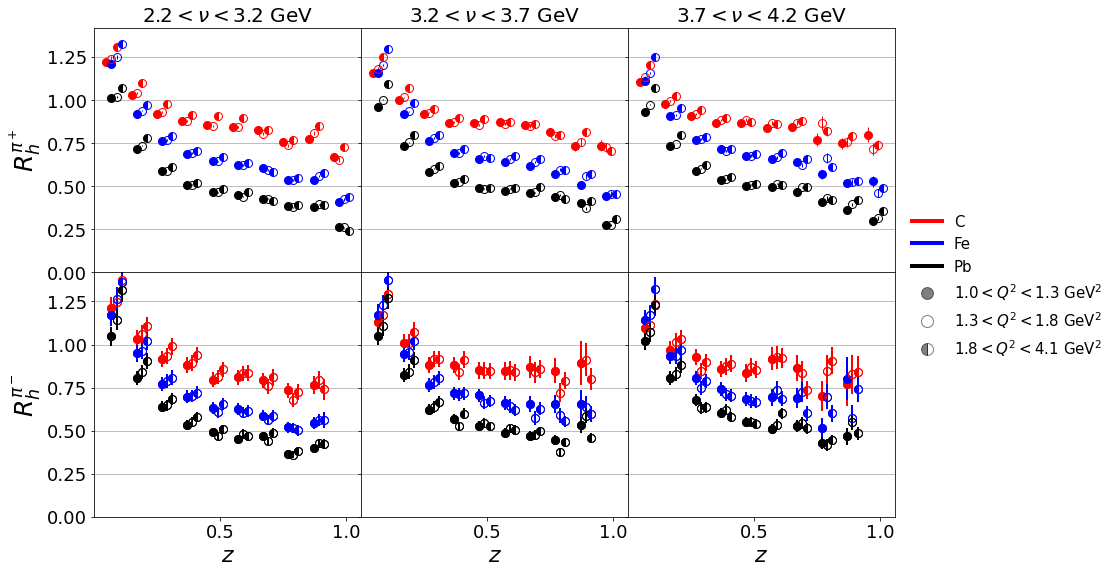

In [5]:
fig, axs = plt.subplots(2, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

q2bin = 1

q2label = {} 
q2label['bin_1'] = '$1.0<Q^{2}<1.3$ GeV$^{2}$' 
q2label['bin_2'] = '$1.3<Q^{2}<1.8$ GeV$^{2}$' 
q2label['bin_3'] = '$1.8<Q^{2}<4.1$ GeV$^{2}$' 

nulabel = {} 
nulabel['bin_1'] = r'$2.2<\nu<3.2$ GeV' 
nulabel['bin_2'] =  r'$3.2<\nu<3.7$ GeV' 
nulabel['bin_3'] =  r'$3.7<\nu<4.2$ GeV' 

colors = {}
#colors['C'] = 'red'
#colors['Fe'] = 'black'
#colors['Pb'] = 'blue'

#colors = {}
#colors['C'] = 'red',#'#1f77b4'
#colors['Fe'] = 'blue'#'#ff7f0e'
#colors['Pb']=  'green'#'#2ca02c'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'left'

for nubin in range(1,4):
    for q2bin in range(1,4):
        print('C_Q2_%ibin_nu_%ibin'%(q2bin,nubin))
        
        ibin = 'pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*(q2bin-1),y[key],yerr=erry[key],color='red',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        
        key = 'Fe_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color='blue',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Pb_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color='black',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

    
        #pi minus
        ibin = 'pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=erry[key][:-1],color='red',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*0.05,2))
        #print(totalerror)
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=totalerror[:-1],color='red',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

        
        key = 'Fe_'+ibin
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=erry[key][:-1],color='blue',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*0.05,2))
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=totalerror[:-1],color='blue',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

        
        key = 'Pb_'+ibin
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=erry[key][:-1],color='black',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*0.05,2))
        axs[1,nubin-1].errorbar(x[key][:-1]+0.02*q2bin,y[key][:-1],yerr=totalerror[:-1],color='black',fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

        
        axs[1,nubin-1].xaxis.set_label_text('$z$',fontsize=22)
        axs[0,nubin-1].set_ylim([0.0,1.42])
        axs[1,nubin-1].set_ylim([0.0,1.42])
        axs[0,nubin-1].grid(True, axis='y')
        axs[1,nubin-1].grid(True, axis='y')

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)
    
    
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=0.5)


h4, = axs[0,0].plot([], ls='none', marker='o', fillstyle='none',
              ms=12, mec='black', mfc='black', mew=1, alpha=0.5)


h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='left',
              ms=12, mec='black', mfc='black', mew=1, alpha=0.5)

handles = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4) , h3,h4,h5     ]



handles = [handles[i] for i in [0,1,2,3,4,5]]
line_labels =['C','Fe','Pb',r'$1.0<Q^{2}<1.3$ GeV$^{2}$',r'$1.3<Q^{2}<1.8$ GeV$^{2}$',r'$1.8<Q^{2}<4.1$ GeV$^{2}$']
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.05,    # Small spacing around legend box
           title="" , # Title for the legend
           frameon=False,
           fontsize=15

          )

plt.subplots_adjust(right=0.82)
 
    
    
axs[0,0].yaxis.set_label_text('$R_{h}^{\pi^+}$',fontsize=25)
axs[1,0].yaxis.set_label_text('$R_{h}^{\pi^-}$',fontsize=25)


#plt.tight_layout()
plt.savefig('Multidifferential_Rh_pip_pim.pdf')
plt.savefig('Multidifferential_Rh_pip_pim.png')


print(color_list)

## Ratio of pi to pi-

In [ ]:
#print pi+

In [5]:
for nubin in range(1,4):
    for q2bin in range(1,4):
        #print('C_Q2_%ibin_nu_%ibin'%(q2bin,nubin))
        
        ibin = 'pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        #print(x[key])
        #print(y[key
        #print(erry[key])
        
        for i in range(len(x['C_'+ibin])):
            print('%2.2f & '%x['C_'+ibin][i],'%2.3f'%y['C_'+ibin][i], '$\pm$', '%2.3f (stat.)'%erry['C_'+ibin][i], '$\pm$', '%2.3f (syst.)'%(0.03*y['C_'+ibin][i]),
                  '& %2.3f'%y['Fe_'+ibin][i], ' $\pm$', '%2.3f (stat.)'%erry['Fe_'+ibin][i], '$\pm$', '%2.3f (syst.)'%(0.03*y['Fe_'+ibin][i]),
                  '& %2.3f'%y['Pb_'+ibin][i], ' $\pm$', '%2.3f (stat.)'%erry['Pb_'+ibin][i], '%2.3f (syst.) \\\  '%(0.03*y['Pb_'+ibin][i])
                  )
        print ('\hline')

0.05 &  1.219 $\pm$ 0.013 (stat.) $\pm$ 0.037 (syst.) & 1.211  $\pm$ 0.012 (stat.) $\pm$ 0.036 (syst.) & 1.013  $\pm$ 0.006 (stat.) 0.030 (syst.) \\  
0.15 &  1.027 $\pm$ 0.004 (stat.) $\pm$ 0.031 (syst.) & 0.921  $\pm$ 0.003 (stat.) $\pm$ 0.028 (syst.) & 0.714  $\pm$ 0.002 (stat.) 0.021 (syst.) \\  
0.25 &  0.920 $\pm$ 0.004 (stat.) $\pm$ 0.028 (syst.) & 0.763  $\pm$ 0.003 (stat.) $\pm$ 0.023 (syst.) & 0.585  $\pm$ 0.002 (stat.) 0.018 (syst.) \\  
0.35 &  0.876 $\pm$ 0.005 (stat.) $\pm$ 0.026 (syst.) & 0.687  $\pm$ 0.004 (stat.) $\pm$ 0.021 (syst.) & 0.503  $\pm$ 0.002 (stat.) 0.015 (syst.) \\  
0.45 &  0.857 $\pm$ 0.006 (stat.) $\pm$ 0.026 (syst.) & 0.645  $\pm$ 0.005 (stat.) $\pm$ 0.019 (syst.) & 0.466  $\pm$ 0.002 (stat.) 0.014 (syst.) \\  
0.55 &  0.844 $\pm$ 0.008 (stat.) $\pm$ 0.025 (syst.) & 0.624  $\pm$ 0.006 (stat.) $\pm$ 0.019 (syst.) & 0.450  $\pm$ 0.003 (stat.) 0.013 (syst.) \\  
0.65 &  0.828 $\pm$ 0.009 (stat.) $\pm$ 0.025 (syst.) & 0.604  $\pm$ 0.006 (stat.) $\pm$ 0.018

## print pi-

In [6]:
for nubin in range(1,4):
    for q2bin in range(1,4):
        #print('C_Q2_%ibin_nu_%ibin'%(q2bin,nubin))
        
        ibin = 'pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        #print(x[key])
        #print(y[key
        #print(erry[key])
        
        for i in range(len(x['C_'+ibin])):
            print('%2.2f & '%x['C_'+ibin][i],'%2.3f'%y['C_'+ibin][i], '$\pm$', '%2.3f (stat.)'%erry['C_'+ibin][i], '$\pm$', '%2.3f (syst.)'%(0.03*y['C_'+ibin][i]),
                  '& %2.3f'%y['Fe_'+ibin][i], ' $\pm$', '%2.3f (stat.)'%erry['Fe_'+ibin][i], '$\pm$', '%2.3f (syst.)'%(0.03*y['Fe_'+ibin][i]),
                  '& %2.3f'%y['Pb_'+ibin][i], ' $\pm$', '%2.3f (stat.)'%erry['Pb_'+ibin][i], '%2.3f (syst.) \\\  '%(0.03*y['Pb_'+ibin][i])
                  )
        print ('\hline')

0.05 &  1.209 $\pm$ 0.024 (stat.) $\pm$ 0.036 (syst.) & 1.173  $\pm$ 0.022 (stat.) $\pm$ 0.035 (syst.) & 1.047  $\pm$ 0.011 (stat.) 0.031 (syst.) \\  
0.15 &  1.033 $\pm$ 0.007 (stat.) $\pm$ 0.031 (syst.) & 0.949  $\pm$ 0.006 (stat.) $\pm$ 0.028 (syst.) & 0.804  $\pm$ 0.003 (stat.) 0.024 (syst.) \\  
0.25 &  0.916 $\pm$ 0.009 (stat.) $\pm$ 0.027 (syst.) & 0.771  $\pm$ 0.007 (stat.) $\pm$ 0.023 (syst.) & 0.640  $\pm$ 0.003 (stat.) 0.019 (syst.) \\  
0.35 &  0.880 $\pm$ 0.012 (stat.) $\pm$ 0.026 (syst.) & 0.698  $\pm$ 0.009 (stat.) $\pm$ 0.021 (syst.) & 0.534  $\pm$ 0.004 (stat.) 0.016 (syst.) \\  
0.45 &  0.796 $\pm$ 0.015 (stat.) $\pm$ 0.024 (syst.) & 0.630  $\pm$ 0.011 (stat.) $\pm$ 0.019 (syst.) & 0.491  $\pm$ 0.005 (stat.) 0.015 (syst.) \\  
0.55 &  0.809 $\pm$ 0.020 (stat.) $\pm$ 0.024 (syst.) & 0.624  $\pm$ 0.014 (stat.) $\pm$ 0.019 (syst.) & 0.453  $\pm$ 0.007 (stat.) 0.014 (syst.) \\  
0.65 &  0.792 $\pm$ 0.023 (stat.) $\pm$ 0.024 (syst.) & 0.587  $\pm$ 0.016 (stat.) $\pm$ 0.018

## Multiplicity ratio vs pT2 (Cronin effect)

In [7]:
#file_pip = TFile.Open('3D_MR_Pt2_piPlus.root')
file_pip = TFile.Open('3D_MR_Pt2_piMinus.root')
file_pip.Print()

TFile: name=3D_MR_Pt2_piMinus.root, title=, option=READ


In [ ]:

y = {}
x = {} 
erry={}
for zbin in range(1,10):
    print(zbin)
    data = file_pip.Get('g_zh_%i_C'%(zbin))
    data.Print()
    y['C_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    x['C_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['C_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    data = file_pip.Get('g_zh_%i_Fe'%(zbin))
    data.Print()
    y['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    x['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    data = file_pip.Get('g_zh_%i_Pb'%(zbin))
    data.Print()
    y['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    x['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)

In [ ]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for zbin in range(2,10):
    print(x['C_pip_%ibin'%(zbin)])
    print(y['C_pip_%ibin'%(zbin)])
    print(erry['C_pip_%ibin'%(zbin)])
    axs[0].plot(x['C_pip_%ibin'%(zbin)],y['C_pip_%ibin'%(zbin)],'-o')
    axs[1].plot(x['Fe_pip_%ibin'%(zbin)],y['Fe_pip_%ibin'%(zbin)],'-o')
    axs[2].plot(x['Pb_pip_%ibin'%(zbin)],y['Pb_pip_%ibin'%(zbin)],'-o')


In [ ]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey='row',figsize=(16,16))#,gridspec_kw={'hspace': 0, 'wspace':0})

for zbin in range(1,10):
    col = ((zbin-1)%3)
    row = ((zbin-1)//3)

    #print(x['C_pip_%ibin'%(zbin)])
    #print(y['C_pip_%ibin'%(zbin)])
    #print(erry['C_pip_%ibin'%(zbin)])
    axs[row,col].errorbar(x['C_pip_%ibin'%(zbin)],y['C_pip_%ibin'%(zbin)],yerr=erry['C_pip_%ibin'%(zbin)],fmt='-o',label='C')
    axs[row,col].errorbar(x['Fe_pip_%ibin'%(zbin)],y['Fe_pip_%ibin'%(zbin)],yerr=erry['Fe_pip_%ibin'%(zbin)],fmt='-o',label='Fe')
    axs[row,col].errorbar(x['Pb_pip_%ibin'%(zbin)],y['Pb_pip_%ibin'%(zbin)],yerr=erry['Pb_pip_%ibin'%(zbin)],fmt='-o',label='Pb')
    zmax = 0.1*zbin
    zmin = 0.1*(zbin-1)
    axs[row,col].legend(frameon=False,loc='upper left')
    axs[row,col].set_title('%2.2f<z<%2.2f'%(zmin,zmax),fontsize=20)

In [ ]:
x_data = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
y_data = {}
erry_data  ={}

y_data['pip_C'] = np.array([1.16751 , 1.01848 , 0.926135 , 0.876012 , 0.8595 , 0.848906 , 0.832911 , 0.762776 , 0.782656 , 0.698996 ])
erry_data['pip_C'] = np.array([0.00321583 , 0.00161351 , 0.00188183 , 0.00233672 , 0.00297862 , 0.00369811 , 0.00445801 , 0.00520291 , 0.00703654 , 0.00844543])
y_data['pip_Fe'] = np.array([1.18002 , 0.931569 , 0.772485 , 0.695442 , 0.653029 , 0.636352 , 0.609999 , 0.549825 , 0.538038 , 0.440439])
erry_data['pip_Fe'] = np.array([0.00297786 , 0.00136259 , 0.00146705 , 0.00175402 , 0.00214668 , 0.00261719 , 0.00307546 , 0.00352656 , 0.00457231 , 0.00516023])
y_data['pip_Pb'] = np.array([0.980339 , 0.747191 , 0.597805 , 0.522714 , 0.4807 , 0.466481 , 0.446264 , 0.399832 , 0.386629 , 0.277573 ])
erry_data['pip_Pb'] = np.array([0.0028235 , 0.00128281 , 0.00136618 , 0.00163387 , 0.00199655 , 0.0024583 , 0.00293294 , 0.00343855 , 0.00452875 , 0.0049117])

for key in y_data.keys():
    print(len(y_data[key]))
    print(len(x_data))
    
    
x_data_pim = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85])

y_data['pim_C'] = np.array([1.16193 , 1.02376 , 0.908824 , 0.884134 , 0.826132 , 0.823838 , 0.802184 , 0.757821 , 0.812838 ])
erry_data['pim_C'] = np.array([ 0.00821278 , 0.00360636 , 0.00431271 , 0.00605682 , 0.00783359 , 0.0109709 , 0.013191 , 0.0149353 , 0.0224106 ]) 
y_data['pim_Fe'] = np.array([1.20089 , 0.943779 , 0.781065 , 0.71245 , 0.654922 , 0.615052 , 0.579656 , 0.541558 , 0.580469   ])
erry_data['pim_Fe'] = np.array([0.00775177 , 0.00298599 , 0.00335861 , 0.00438738 , 0.00557023 , 0.00731394 , 0.00836846 , 0.00938174 , 0.0139264 ]) 
y_data['pim_Pb'] = np.array([1.10823 , 0.82848 , 0.655256 , 0.569205 , 0.514732 , 0.488098 , 0.474604 , 0.37538 , 0.468502  ])
erry_data['pim_Pb'] = np.array([ 0.00803963 , 0.00297901 , 0.00330299 , 0.00429422 , 0.00555248 , 0.00741222 , 0.00917479 , 0.00909736 , 0.0153437 ])

In [25]:
np.logspace(np.log10(0.02),np.log10(1.5),11)

array([0.02      , 0.03079896, 0.04742881, 0.07303792, 0.11247461,
       0.17320508, 0.26672686, 0.41074556, 0.63252691, 0.97405871,
       1.5       ])

In [ ]:
np.logspace(-2,0,20)
